In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def initCentroid(img_1d, k_clusters,init_centroids):
    if init_centroids == 'random':
        return np.random.randint(0, 255, size=(k_clusters, len(img_1d[0])))
    elif init_centroids == 'in_pixels':
        return img_1d[np.random.choice(img_1d.shape[0], size=k_clusters),:]
    else:
        print("'init_centroids' is not valid")
        return None

In [25]:
def updateCentroid(img_1d, labels, old_centroids):
    centroids = np.zeros(old_centroids.shape)
    for j in range(old_centroids.shape[0]):
            pixels = img_1d[labels == j]
            if pixels.shape[0]: 
                centroids[j] = np.mean(pixels, axis=0)
    return centroids

In [26]:
def Kmeans(img_1d, k_clusters, max_iter,init_centroids):
    centroids = initCentroid(img_1d, k_clusters,init_centroids)
    for i in range(max_iter):
        distance = np.sum(np.abs(img_1d[:,np.newaxis]- centroids),axis=2)
        labels = np.argmin(distance,axis=1)
        
        old_centroids = centroids
        centroids = updateCentroid(img_1d, labels, centroids)
        if np.allclose(old_centroids, centroids, rtol=10e-3, equal_nan=False):
            break
          
    return centroids, labels

In [27]:
def saveImg(result):
    res_name = input("Enter name image for output ('name.png'): ")
    Image.fromarray(result.astype(np.uint8)).save(res_name)
    

In [28]:
def main():
    name = input("Enter your image: ")
    image = Image.open(name)
    img = np.array(image)
    img_1d = img.reshape(-1, 3)
    
    k_clusters = int(input("Enter number of clusters (3,5,7,..): "))
    init_centroids = input("Enter init_centroids(random or in_pixels): ")
    centroids, labels = Kmeans(img_1d,k_clusters,1000,init_centroids)
    
    res = centroids[labels].astype(np.uint8)
    res = res.reshape(img.shape)
    plt.imshow(res)
    saveImg(res)

Enter your image: dog.png
Enter number of clusters (3,5,7,..): 15
Enter init_centroids(random or in_pixels): random
Enter name image for output ('name.png'): d.png


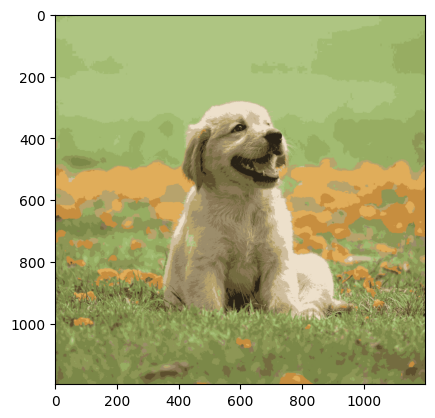

In [29]:
if __name__ == "__main__":
    main()